# Step-1: Data pre-processing Step

## 1.1: Importing Libraries
 * the numpy we have imported for the performing mathematics calculation.
 * matplotlib is for plotting the graph.
 * pandas are for managing the dataset.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1.2: Importing datasets

In [2]:
dataset = pd.read_csv('C:/Users/singh/OneDrive/Desktop/Mall_Customers.csv')

## 1.3: Information about datasets

In [3]:
# getting some information about data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
# finding first 5 rows in the data frame
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
# finding shape(rows*columns) and discription of first and last 5 rows
dataset.describe

<bound method NDFrame.describe of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [6]:
# checking missing value in dataframe
dataset.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## 1.4: Extracting Independent Variables
we want to make group based on spending score. so, choosing the annual Income(k$) column and spending score(1-100).
Customer ID, Gender, Age are not required.

In [7]:
x = dataset.iloc[:, [3, 4]].values

In [8]:
print(x)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

# Step-2: Finding the optimal number of clusters using the elbow method
* we have used the KMeans class of sklearn. cluster library to form the clusters.

* the elbow method uses the WCSS(within cluster sum of square) concept to draw the plot by plotting WCSS values on the Y-axis and the number of clusters on  the X-axis. So we are going to calculate the value for WCSS for different k values ranging from 1 to 10.

In [11]:
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

In [12]:
#Initializing the list for the values of WCSS

wcss_list= []

#Using for loop for iterations from 1 to 10.
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)
    kmeans.fit(x)
    wcss_list.append(kmeans.inertia_)

## 2.1: Plotted the graph between the number of clusters and WCSS.

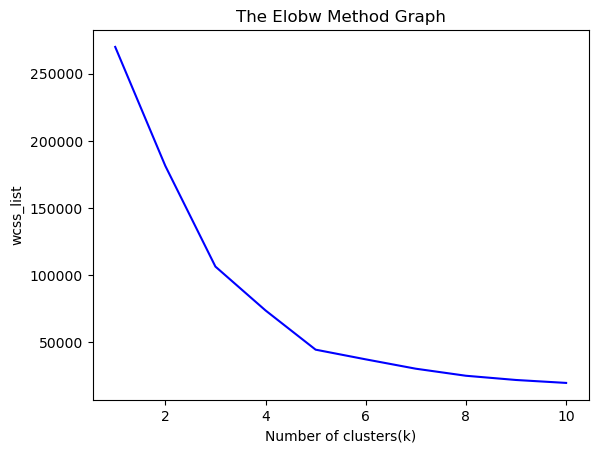

In [28]:
# plt.plot(range(1, 11), wcss_list,"rp")
plt.plot(range(1, 11), wcss_list,"b")
plt.title('The Elobw Method Graph')
plt.xlabel('Number of clusters(k)')
plt.ylabel('wcss_list')
plt.show()

### we can see the elbow point is at 5 and 3. So the number of clusters we will choose 5 because after there is no elbow point and if we want equirate answer then prefer higher value of number of clusters.

# Step- 3: Training the K-means algorithm on the training dataset

In [14]:
#training the K-means model on a dataset
kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 42)
y_predict= kmeans.fit_predict(x)

# Step-4: Visualizing the Clusters

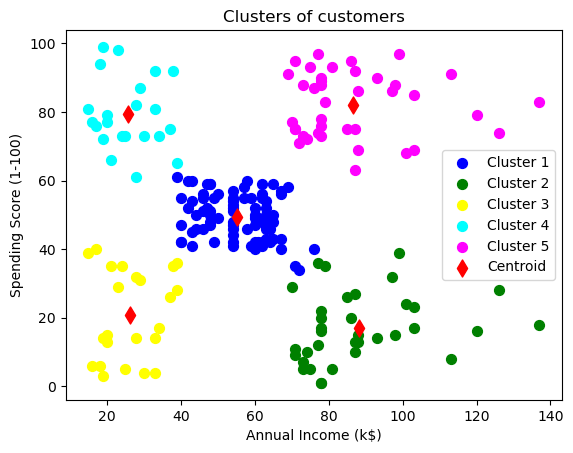

In [30]:
#visulaizing the clusters
#for first cluster
plt.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 50, c = 'blue', label = 'Cluster 1')  
#for second cluster
plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 50, c = 'green', label = 'Cluster 2')
#for third cluster 
plt.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 50, c = 'yellow', label = 'Cluster 3') 
#for fourth cluster
plt.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')
#for fifth cluster
plt.scatter(x[y_predict == 4, 0], x[y_predict == 4, 1], s = 50, c = 'magenta', label = 'Cluster 5')

#Plot the centroid. This time we're going to use the cluster centres
#attribute that returns here the coordinates of the centroid.
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 75, c = 'red',marker="d", label = 'Centroid')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

plt.legend()
plt.show()

## Result:
### The output image is clearly showing the five different clusters with different colors. The clusters are formed between two parameters of the dataset; Annual income of customer and Spending. We can change the colors and labels as per the requirement or choice. We can also observe some points from the above patterns, which are given below:

* Cluster1 shows the customers with average salary and average spending.
* Cluster2 shows the customer has a high income but low spending, so we can categorize them as careful.
* Cluster3 shows the low income and also low spending so they can be categorized as sensible.
* Cluster4 shows the customers with low income with very high spending so they can be categorized as careless.
* Cluster5 shows the customers with high income and high spending so they can be categorized as target, and these customers can be the most profitable customers for the mall owner.

# Step-5:Printing dataset clusterwise

In [43]:
dataset['cluster']=y_predict
dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,4
196,197,Female,45,126,28,1
197,198,Male,32,126,74,4
198,199,Male,32,137,18,1


In [42]:
dataset_of_cluster1= dataset[dataset['cluster']== 0]
dataset_of_cluster1

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
43,44,Female,31,39,61,0
46,47,Female,50,40,55,0
47,48,Female,27,40,47,0
48,49,Female,29,40,42,0
49,50,Female,31,40,42,0
...,...,...,...,...,...,...
121,122,Female,38,67,40,0
122,123,Female,40,69,58,0
126,127,Male,43,71,35,0
132,133,Female,25,72,34,0


In [44]:
dataset_of_cluster2= dataset[dataset['cluster']== 1]
dataset_of_cluster2

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
124,125,Female,23,70,29,1
128,129,Male,59,71,11,1
130,131,Male,47,71,9,1
134,135,Male,20,73,5,1
136,137,Female,44,73,7,1
138,139,Male,19,74,10,1
140,141,Female,57,75,5,1
144,145,Male,25,77,12,1
146,147,Male,48,77,36,1
148,149,Female,34,78,22,1


In [45]:
dataset_of_cluster3= dataset[dataset['cluster']== 2]
dataset_of_cluster3

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,2
2,3,Female,20,16,6,2
4,5,Female,31,17,40,2
6,7,Female,35,18,6,2
8,9,Male,64,19,3,2
10,11,Male,67,19,14,2
12,13,Female,58,20,15,2
14,15,Male,37,20,13,2
16,17,Female,35,21,35,2
18,19,Male,52,23,29,2


In [46]:
dataset_of_cluster4= dataset[dataset['cluster']== 3]
dataset_of_cluster4

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
1,2,Male,21,15,81,3
3,4,Female,23,16,77,3
5,6,Female,22,17,76,3
7,8,Female,23,18,94,3
9,10,Female,30,19,72,3
11,12,Female,35,19,99,3
13,14,Female,24,20,77,3
15,16,Male,22,20,79,3
17,18,Male,20,21,66,3
19,20,Female,35,23,98,3


In [47]:
dataset_of_cluster5= dataset[dataset['cluster']== 4]
dataset_of_cluster5

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
123,124,Male,39,69,91,4
125,126,Female,31,70,77,4
127,128,Male,40,71,95,4
129,130,Male,38,71,75,4
131,132,Male,39,71,75,4
133,134,Female,31,72,71,4
135,136,Female,29,73,88,4
137,138,Male,32,73,73,4
139,140,Female,35,74,72,4
141,142,Male,32,75,93,4
